--2024-03-06 14:01:57--  https://pseudopotentials.quantum-espresso.org/upf_files/Ni.pbesol-spn-kjpaw_psl.1.0.0.UPF
Auflösen des Hostnamens pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)… 51.77.118.191
Verbindungsaufbau zu pseudopotentials.quantum-espresso.org (pseudopotentials.quantum-espresso.org)|51.77.118.191|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 1819082 (1,7M)
Wird in »Ni.pbesol-spn-kjpaw_psl.1.0.0.UPF« gespeichert.

     0K .......... .......... .......... .......... ..........  2%  811K 2s
    50K .......... .......... .......... .......... ..........  5% 1,46M 2s
   100K .......... .......... .......... .......... ..........  8% 5,61M 1s
   150K .......... .......... .......... .......... .......... 11% 2,36M 1s
   200K .......... .......... .......... .......... .......... 14% 2,97M 1s
   250K .......... .......... .......... .......... .......... 16% 21,6M 1s
   300K .......... .......... .........

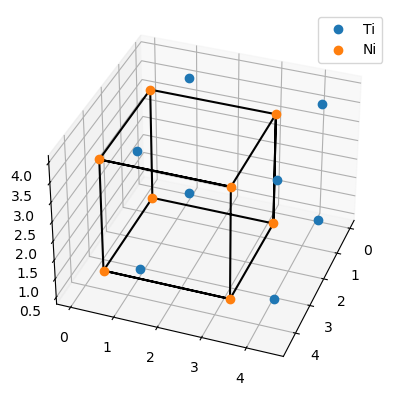

In [1]:
import setup
import numpy as np
from matplotlib import pyplot as plt
from tight_binding_redweasel import qespresso_interface as qe

# if you want to use a local installation, add it to the path like this:
#import os
#qe_path = os.path.expanduser("~/path/to/q-e/bin/")
#if qe_path not in os.environ["PATH"]:
#    os.environ["PATH"] += os.pathsep + qe_path

qe.qe_prepare({"Ni": "Ni.pbesol-spn-kjpaw_psl.1.0.0.UPF", "Ti": "Ti.pbesol-spn-kjpaw_psl.1.0.0.UPF"})

basis = [(0, 0, 0), (0.5, 0.5, 0.5)]
types = ["Ni", "Ti"]
crystal = qe.QECrystal("nitinol_2_993", np.eye(3)*2.993, basis, types, 50.0)

crystal.plot_crystal(2)
plt.show()

In [3]:
crystal.scf(8)

running the scf calculation for nitinol_2_993

     Program PWSCF v.6.7MaX starts on 15Nov2023 at 15: 8:49 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on    12 processors

     MPI processes distributed on     1 nodes
     R & G space division:  proc/nbgrp/npool/nimage =      12
     Waiting for input...
     Reading input from standard input

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3
     file Ti.

In [7]:
k_points, weights, bands, S, fermi_energy = crystal.read_bands()
print(len(k_points))
print(len(S))
print(fermi_energy)


286
48
16.15804591203698


In [5]:
crystal.bands(20, crystal.k_grid(20))

running the band-structure calculation for nitinol_2_993

     Program PWSCF v.6.7MaX starts on 15Nov2023 at 16:22:43 

     This program is part of the open-source Quantum ESPRESSO suite
     for quantum simulation of materials; please cite
         "P. Giannozzi et al., J. Phys.:Condens. Matter 21 395502 (2009);
         "P. Giannozzi et al., J. Phys.:Condens. Matter 29 465901 (2017);
          URL http://www.quantum-espresso.org", 
     in publications or presentations arising from this work. More details at
     http://www.quantum-espresso.org/quote

     Parallel version (MPI), running on    12 processors

     MPI processes distributed on     1 nodes
     R & G space division:  proc/nbgrp/npool/nimage =      12
     Waiting for input...
     Reading input from standard input

     Current dimensions of program PWSCF are:
     Max number of different atomic species (ntypx) = 10
     Max number of k-points (npk) =  40000
     Max angular momentum in pseudopotentials (lmaxx) =  3

 

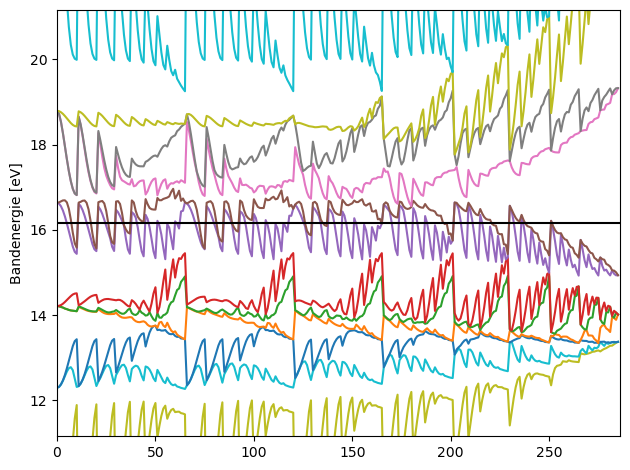

In [17]:
# plot band structure from the computation

k_points, weights, bands, symmetries, fermi_energy = crystal.read_bands(incomplete=True)

from matplotlib import pyplot as plt

qe.plot_bands_generic(bands, None, '-')
plt.hlines([fermi_energy], 0, len(k_points), 'k')
plt.ylabel("Bandenergie [eV]")
plt.xlim(0, len(k_points))
plt.ylim(fermi_energy - 5, fermi_energy + 5)
plt.tight_layout()
plt.show()

In [13]:
# compute the density of states in a plottable format using QUANTUM ESPRESSO
crystal.dos()

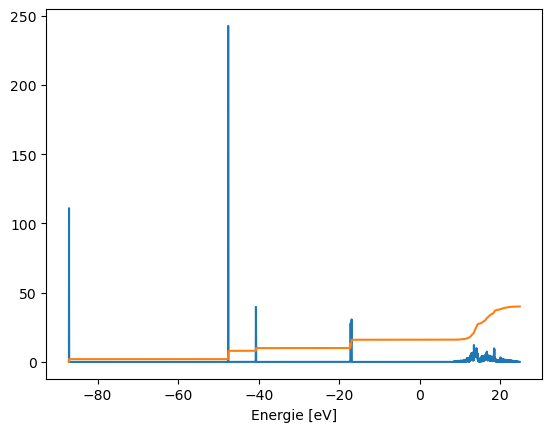

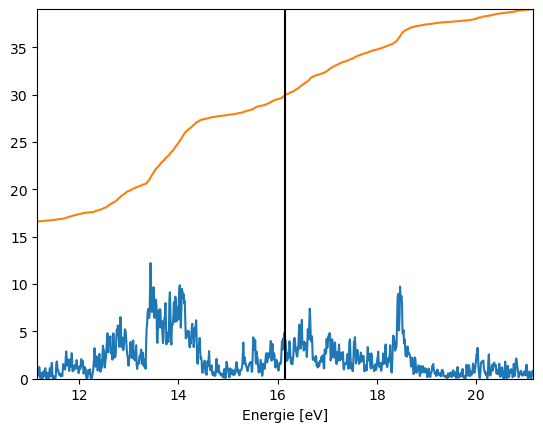

In [18]:
# plot density of states

density_of_states, fermi_energy = crystal.read_dos()

from matplotlib import pyplot as plt

plt.plot(density_of_states[0], density_of_states[1])
plt.plot(density_of_states[0], density_of_states[2])
plt.xlabel("Energie [eV]")
plt.show()

sel = (fermi_energy - 5 < density_of_states[0]) & (density_of_states[0] < fermi_energy + 5)
ymax = max(np.max(density_of_states[2][sel]), np.max(density_of_states[1][sel]))
plt.plot(density_of_states[0][sel], density_of_states[1][sel])
plt.plot(density_of_states[0][sel], density_of_states[2][sel])
plt.vlines([fermi_energy], 0, ymax, 'k')
plt.xlabel("Energie [eV]")
plt.xlim(fermi_energy - 5, fermi_energy + 5)
plt.ylim(0, ymax)
plt.show()